In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

### Exemplo simples

In [2]:
# Definindo os clusters
# Grupo 1: Jovens, baixo uso
np.random.seed(6661)
idade_grupo1 = np.random.normal(20, 3, 100)  # Média de 20 anos, desvio padrão de 3
tempo_uso_grupo1 = np.random.normal(30, 5, 100)  # Média de 30 minutos, desvio padrão de 5

# Grupo 2: Jovens, alto uso
idade_grupo2 = np.random.normal(20, 3, 100)
tempo_uso_grupo2 = np.random.normal(120, 10, 100)  # Média de 120 minutos, desvio padrão de 10

# Grupo 3: Idosos, baixo uso
idade_grupo3 = np.random.normal(60, 5, 100)  # Média de 60 anos, desvio padrão de 5
tempo_uso_grupo3 = np.random.normal(30, 5, 100)

# Grupo 4: Idosos, alto uso
idade_grupo4 = np.random.normal(60, 5, 100)
tempo_uso_grupo4 = np.random.normal(120, 10, 100)

In [3]:
idade = np.concatenate([idade_grupo1, idade_grupo2, idade_grupo3, idade_grupo4])
tempo_uso = np.concatenate([tempo_uso_grupo1, tempo_uso_grupo2, tempo_uso_grupo3, tempo_uso_grupo4])

In [4]:
data = pd.DataFrame({'idade': idade, 'tempo_uso': tempo_uso})
# round columns
data = data.round()
# to int
data = data.astype(int)
data

,idade,tempo_uso
0,25,16
1,19,28
2,22,34
3,19,33
4,25,29
...,...,...
395,58,129
396,60,121
397,66,126
398,71,115


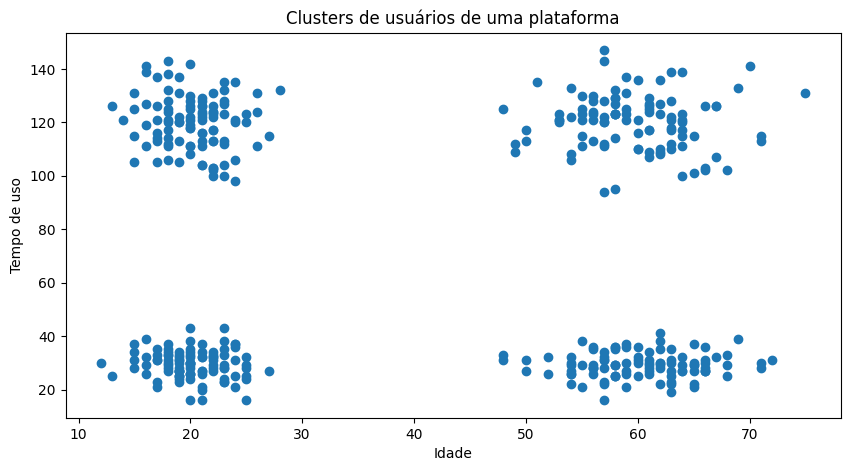

In [5]:
plt.figure(figsize=(10, 5))
plt.scatter(data['idade'], data['tempo_uso'])
plt.xlabel('Idade')
plt.ylabel('Tempo de uso')
plt.title('Clusters de usuários de uma plataforma')
plt.show()

In [6]:
# executando o KMeans
km1 = KMeans(n_clusters=4)
km1.fit(data)

KMeans(n_clusters=4)

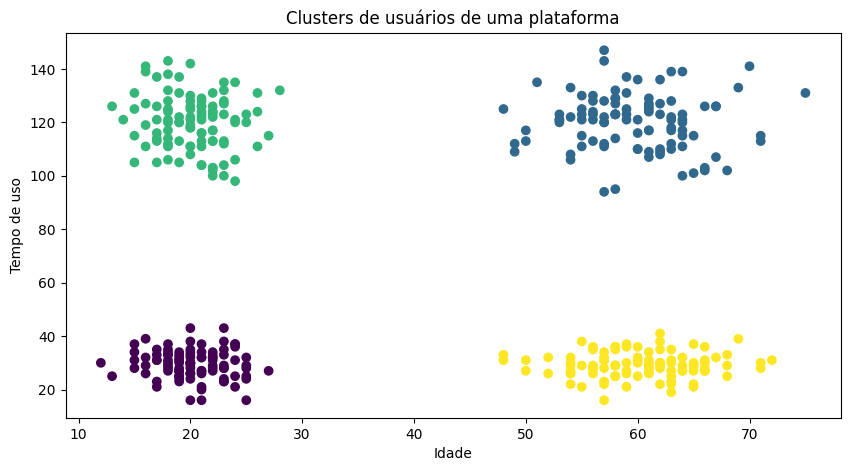

In [7]:
# plot dos clusters
plt.figure(figsize=(10, 5))
plt.scatter(data['idade'], data['tempo_uso'], c=km1.labels_)
plt.xlabel('Idade')
plt.ylabel('Tempo de uso')
plt.title('Clusters de usuários de uma plataforma')
plt.show()

### Exemplo mais robusto

#### Similares
* https://ai.google.dev/gemini-api/tutorials/clustering_with_embeddings?hl=pt-br

In [8]:
df = pd.read_csv('mpst_embedded.csv')
df.head()

,imdb_id,title,plot_synopsis,tags,split,synopsis_source,plot_embedding
0,tt0366444,Fighting Tommy Riley,Tommy Riley (J. P. Davis) stands in boxing gea...,romantic,val,wikipedia,"[-0.0358068123459816, -0.0028074306901544333, ..."
1,tt0432291,The Fog,As the Californian coastal town of Antonio Bay...,"revenge, murder, storytelling, flashback",train,wikipedia,"[0.007099490612745285, 0.007497160229831934, -..."
2,tt1087472,Safehouse,A beautiful business partner. A peaceful marin...,revenge,train,imdb,"[-0.003003120655193925, 0.0120626799762249, -0..."
3,tt0181262,Thundarr the Barbarian,Thundarr the Barbarian is set in a future (c. ...,"good versus evil, psychedelic",train,wikipedia,"[-0.030307963490486145, 0.05825262516736984, -..."
4,tt4009278,Shut In,"Steven (Charlie Heaton), is a troubled kid who...",revenge,train,wikipedia,"[0.041896771639585495, 0.014580665156245232, -..."


In [9]:
# create matrix
X = df['plot_embedding']
# eval to convert string to list
X = X.apply(eval)
X = np.array(X.tolist())
X

array([[-0.03580681, -0.00280743, -0.17634355, ...,  0.00558269,
        -0.03714745,  0.00748482],
       [ 0.00709949,  0.00749716, -0.23240203, ..., -0.05063584,
        -0.00415005, -0.00378265],
       [-0.00300312,  0.01206268, -0.18488094, ..., -0.06622845,
        -0.01786037,  0.01461979],
       ...,
       [ 0.01493169,  0.02445779, -0.18926524, ..., -0.03183008,
        -0.01466049,  0.00124324],
       [-0.02325751,  0.04028229, -0.19963166, ...,  0.01061876,
        -0.02298516,  0.00704264],
       [ 0.01832164,  0.00723133, -0.20995475, ..., -0.03041354,
        -0.03979909, -0.07004852]])

In [10]:
X.shape

(1000, 768)

Só para ter uma ideia de clusteres...

In [11]:
df['tags'].unique()

array(['romantic', 'revenge, murder, storytelling, flashback', 'revenge',
       'good versus evil, psychedelic', 'revenge, murder',
       'boring, murder, sadist, flashback', 'murder, flashback',
       'revenge, flashback', 'comedy, murder, violence',
       'tragedy, romantic, murder', 'suspenseful, murder', 'melodrama',
       'avant garde, murder, violence, intrigue, flashback, revenge, sadist',
       'good versus evil', 'cult, murder', 'violence, sci-fi', 'violence',
       'psychological, satire, flashback', 'murder', 'cult',
       'romantic, murder', 'romantic, flashback',
       'paranormal, violence, murder', 'horror',
       'good versus evil, revenge, cult',
       'boring, murder, violence, revenge, flashback, romantic',
       'romantic, boring, entertaining',
       'brainwashing, violence, action, murder, flashback',
       'revenge, cult, psychedelic, violence', 'romantic, humor, murder',
       'psychedelic',
       'tragedy, romantic, murder, atmospheric, sentimen

In [12]:
df['tags'].nunique()

548

Vamos tentar com um número pequeno. Se necessário, aumentamos.

In [19]:
km2 = KMeans(n_clusters=5)
km2.fit(X)

KMeans(n_clusters=5)

In [14]:
df['cluster'] = km2.labels_
df.head()

,imdb_id,title,plot_synopsis,tags,split,synopsis_source,plot_embedding,cluster
0,tt0366444,Fighting Tommy Riley,Tommy Riley (J. P. Davis) stands in boxing gea...,romantic,val,wikipedia,"[-0.0358068123459816, -0.0028074306901544333, ...",3
1,tt0432291,The Fog,As the Californian coastal town of Antonio Bay...,"revenge, murder, storytelling, flashback",train,wikipedia,"[0.007099490612745285, 0.007497160229831934, -...",2
2,tt1087472,Safehouse,A beautiful business partner. A peaceful marin...,revenge,train,imdb,"[-0.003003120655193925, 0.0120626799762249, -0...",0
3,tt0181262,Thundarr the Barbarian,Thundarr the Barbarian is set in a future (c. ...,"good versus evil, psychedelic",train,wikipedia,"[-0.030307963490486145, 0.05825262516736984, -...",2
4,tt4009278,Shut In,"Steven (Charlie Heaton), is a troubled kid who...",revenge,train,wikipedia,"[0.041896771639585495, 0.014580665156245232, -...",3


In [24]:
# analisando primeiros 10 filmes do cluster 1
df[df['cluster'] == 3].head(10)

,imdb_id,title,plot_synopsis,tags,split,synopsis_source,plot_embedding,cluster
0,tt0366444,Fighting Tommy Riley,Tommy Riley (J. P. Davis) stands in boxing gea...,romantic,val,wikipedia,"[-0.0358068123459816, -0.0028074306901544333, ...",3
4,tt4009278,Shut In,"Steven (Charlie Heaton), is a troubled kid who...",revenge,train,wikipedia,"[0.041896771639585495, 0.014580665156245232, -...",3
6,tt0338097,Head in the Clouds,"In a prologue set in Paris in the year 1921, a...","boring, murder, sadist, flashback",train,wikipedia,"[0.03497941419482231, 0.005128819029778242, -0...",3
9,tt0069840,The Candy Snatchers,Candy (Susan Sennett) is a 16-year-old girl wh...,"comedy, murder, violence",train,wikipedia,"[0.028958631679415703, 0.009187991730868816, -...",3
12,tt0101565,Changes,Melanie Adams is a divorced mother who gave bi...,melodrama,test,wikipedia,"[0.027810441330075264, -0.006237902212888002, ...",3
15,tt0077289,California Suite,"In Visitor from New York, Hannah Warren is a M...",romantic,train,wikipedia,"[-0.03449482098221779, 0.0396447591483593, -0....",3
21,tt0042192,All About Eve,"At a prestigious awards ceremony, the celebrit...","psychological, satire, flashback",val,imdb,"[-0.03026406839489937, 0.0443897545337677, -0....",3
23,tt0062292,The Sorcerers,Dr. Marcus Monserrat (Boris Karloff) is an eld...,murder,train,wikipedia,"[-0.03370687738060951, 0.04239877685904503, -0...",3
28,tt0040623,My Brother Jonathan,The story revolves around the life of Jonathan...,"romantic, flashback",train,wikipedia,"[-0.04203043878078461, 0.03134021908044815, -0...",3
31,tt0250593,Mom's Got a Date with a Vampire,"Divorced, ex-rockabilly singer Lynette Hansen ...",horror,val,imdb,"[-0.01855672523379326, -0.029411131516098976, ...",3


In [17]:
# quantos membros em cada cluster
df['cluster'].value_counts()

cluster
3    273
2    250
4    237
0    200
1     40
Name: count, dtype: int64

In [18]:
# quantas tags tem a palavra murder
count = df['tags'].str.contains('murder').sum()
count

np.int64(390)